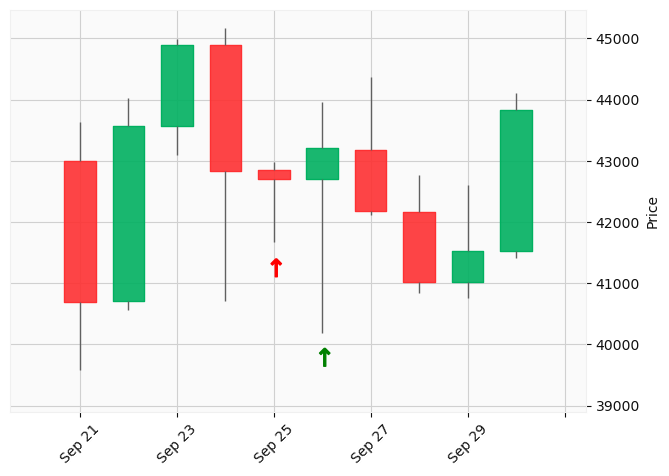

In [162]:
import numpy as np
import mplfinance as mpf
import pandas as pd
import requests
import os

ROOT_DIR = os.path.abspath(os.curdir)
BASE_URL = 'http://localhost:1010'

# setup
symbol = 'BTCUSD'
interval = 'ONE_DAY'
limit = 10
# startTime
# endTime

# url - price action plot url - /plot-candlestick-data
# body - symbol / interval / take last N
url_plot_candlestick_data = BASE_URL + '/plot-candlestick-data'
resp_plot_candlestick_data = requests.post(
    url=url_plot_candlestick_data,
    json={
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
)
df = pd.read_json(resp_plot_candlestick_data.text)
df.index = pd.DatetimeIndex(df['Date'])

# temp file name - symbol / interval / take last N.csv
csv_name = symbol + '_' + interval + '_' + str(limit) + '.csv'
df.to_csv(csv_name)
daily = pd.read_csv(ROOT_DIR + '/' + csv_name, index_col=0, parse_dates=True)

# TODO - replace with body later
url_identify_configured_patterns = BASE_URL + '/identify-configured-patterns'
resp_identify_configured_patterns = requests.post(
    url=url_identify_configured_patterns
)
patterns = pd.read_json(resp_identify_configured_patterns.text)

arrow_down = '$\\downarrow$'
arrow_up = '$\\uparrow$'

green = 'g'
red = 'r'
black = 'b'

markers = []
color = []
for index, row in patterns.iterrows():
    if row[0] is not None:
        if row[0]['type'] == 'LONG_PINBAR_DOWN':
            markers.append(arrow_up)
        elif row[0]['type'] == 'LONG_PINBAR_UP':
            markers.append(arrow_down + " pinbar")

        if row[0]['type'] == 'SHORT_PINBAR_DOWN':
            markers.append(arrow_up)
        elif row[0]['type'] == 'SHORT_PINBAR_UP':
            markers.append(arrow_down)

        if row[0]['color'] == 'GREEN':
            color.append(green)
        else:
            color.append(red)
    else:
        markers.append(None)
        color.append(black)

ap = mpf.make_addplot(0.99*df['Low'],type='scatter',marker=markers,markersize=165,color=color)

mpf.plot(daily, type='candle', style='yahoo', volume=False, addplot=ap)